In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data set
store =pd.read_csv(r"D:\vs_code\sales_predict\stores_data_set.csv")
sales =pd.read_csv(r"D:\vs_code\sales_predict\sales_data_set.csv")
features = pd.read_csv(r"D:\vs_code\sales_predict\Features_data_set.csv")

In [3]:
store.shape

(45, 3)

In [4]:
store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [5]:
sales.shape

(421570, 5)

In [6]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
features.shape

(8190, 12)

In [8]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
#Merge the three datasets in a unique dataframe
merged= pd.merge(sales,features, on=['Store','Date',"IsHoliday"], how='left')
df=pd.merge(merged,store, on=['Store'], how='left')

In [10]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [11]:
df=df.fillna(0)

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [13]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [14]:
df["Month"] = df["Date"].dt.month
df["Year"]  = df["Date"].dt.year
df["Week"]  = df["Date"].dt.isocalendar().week

In [15]:
df.drop(['Date'],axis=1,inplace=True)

In [16]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Month', 'Year',
       'Week'],
      dtype='object')

In [17]:
df.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Month           0
Year            0
Week            0
dtype: int64

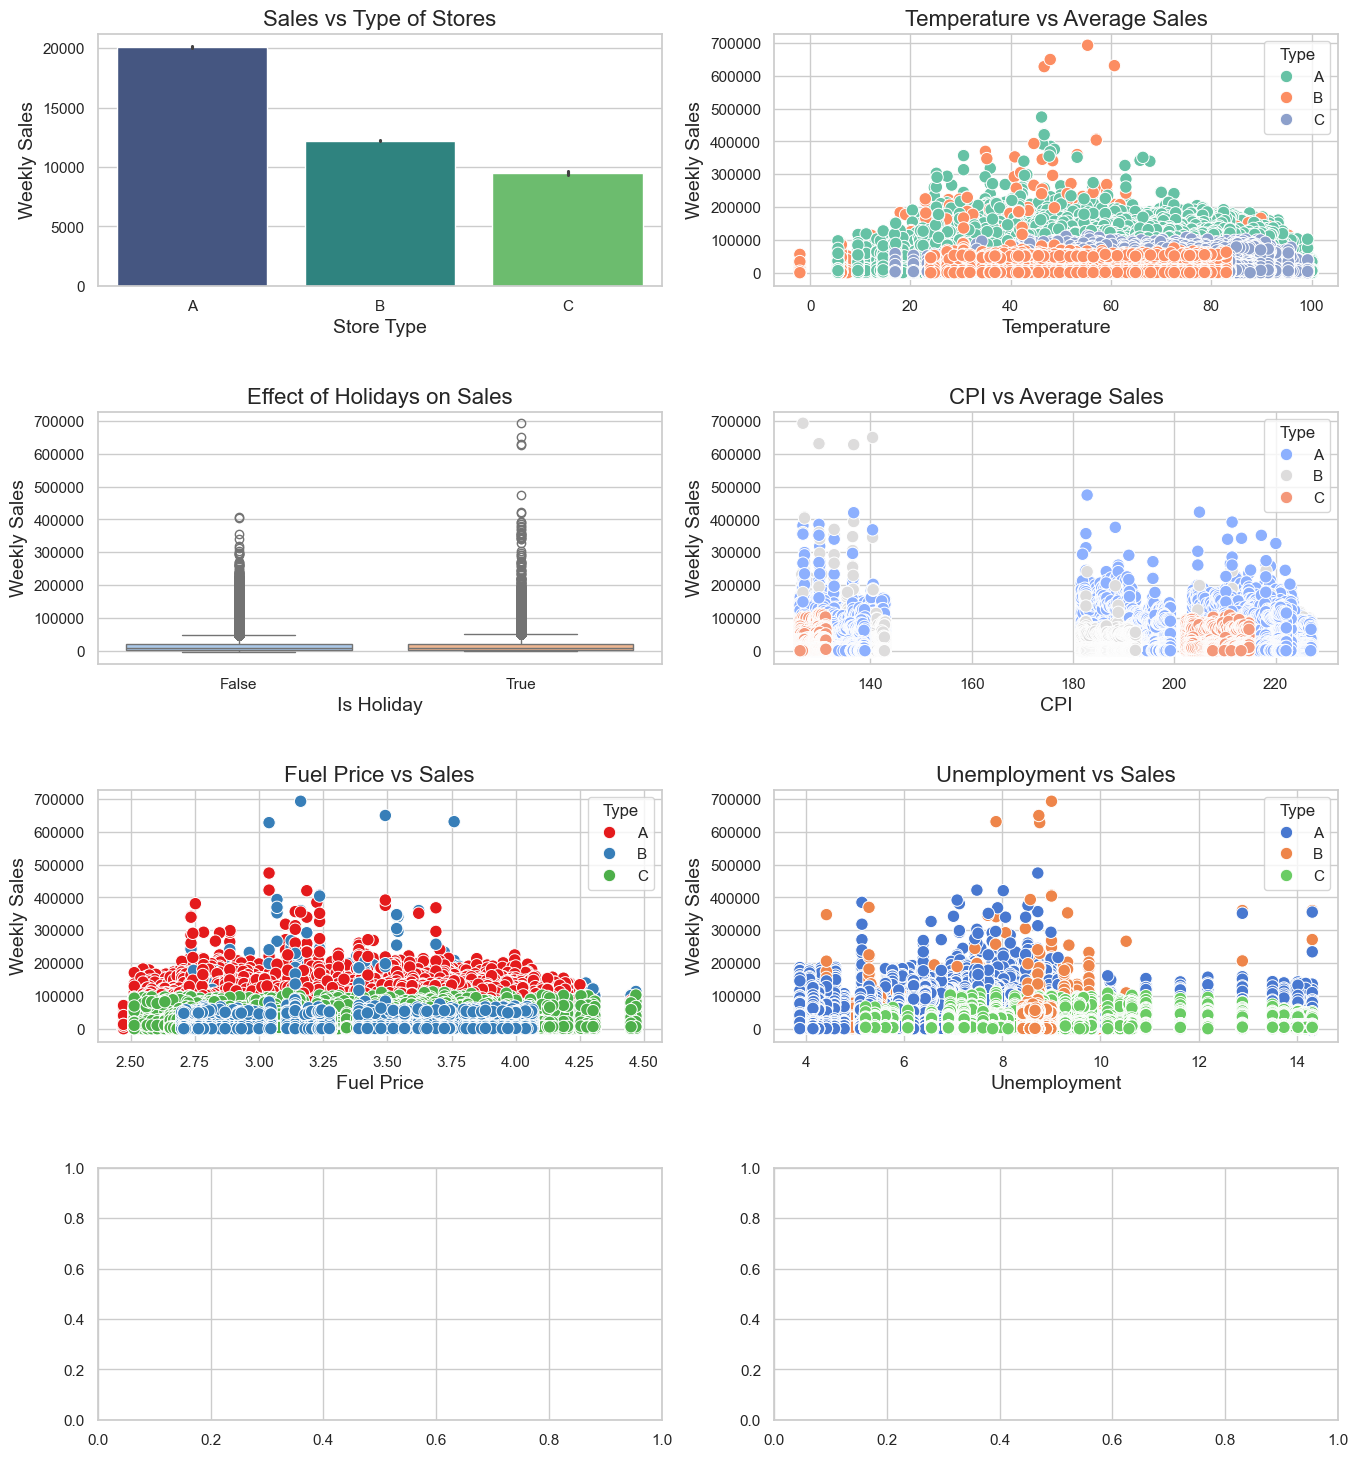

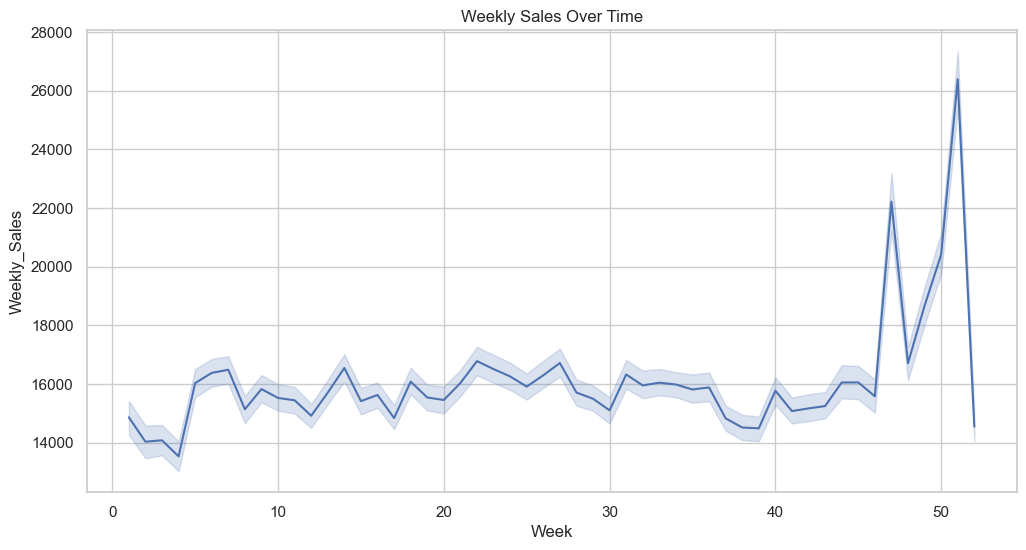

In [19]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots

# Analysis 1: Sales vs Type of Stores
sns.barplot(x='Type', y='Weekly_Sales', data=df, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title('Sales vs Type of Stores', fontsize=16)
axes[0, 0].set_xlabel('Store Type', fontsize=14)
axes[0, 0].set_ylabel('Weekly Sales', fontsize=14)

# Analysis 2: Temperature vs Average Sales
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, hue='Type', palette='Set2', s=80, ax=axes[0, 1])
axes[0, 1].set_title('Temperature vs Average Sales', fontsize=16)
axes[0, 1].set_xlabel('Temperature', fontsize=14)
axes[0, 1].set_ylabel('Weekly Sales', fontsize=14)

# Analysis 3: Effect of Holidays on Sales
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df, palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Effect of Holidays on Sales', fontsize=16)
axes[1, 0].set_xlabel('Is Holiday', fontsize=14)
axes[1, 0].set_ylabel('Weekly Sales', fontsize=14)

# Analysis 4: CPI vs Average Sales
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, hue='Type', palette='coolwarm', s=80, ax=axes[1, 1])
axes[1, 1].set_title('CPI vs Average Sales', fontsize=16)
axes[1, 1].set_xlabel('CPI', fontsize=14)
axes[1, 1].set_ylabel('Weekly Sales', fontsize=14)

# Analysis 5: Fuel Price vs Sales
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, hue='Type', palette='Set1', s=80, ax=axes[2, 0])
axes[2, 0].set_title('Fuel Price vs Sales', fontsize=16)
axes[2, 0].set_xlabel('Fuel Price', fontsize=14)
axes[2, 0].set_ylabel('Weekly Sales', fontsize=14)

# Analysis 6: Unemployment vs Sales
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, hue='Type', palette='muted', s=80, ax=axes[2, 1])
axes[2, 1].set_title('Unemployment vs Sales', fontsize=16)
axes[2, 1].set_xlabel('Unemployment', fontsize=14)
axes[2, 1].set_ylabel('Weekly Sales', fontsize=14)


# Analysis 7: Weekly Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Over Time')
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

df['Type']= LabelEncoder().fit_transform(df['Type'])
df['IsHoliday']= LabelEncoder().fit_transform(df['IsHoliday'])
df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,Week
0,1,1,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,151315,2,2010,5
1,1,1,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,0,151315,2,2010,6
2,1,1,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,151315,2,2010,7
3,1,1,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,151315,2,2010,8
4,1,1,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0,151315,3,2010,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,1,118221,9,2012,39
421566,45,98,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,1,118221,10,2012,40
421567,45,98,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,1,118221,10,2012,41
421568,45,98,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,1,118221,10,2012,42


In [21]:
X=df[['Store','Dept','IsHoliday','Size','Month','Year','Week','Type']]
y=df['Weekly_Sales']

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 1, 2, 3]  # Adjust these values
}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 19298787.722401142
R-squared: 0.9629916371457212


In [23]:
print(y_pred)

[47784.54166667  3451.19       10604.48105263 ... 18716.59625
 12451.55       58817.64714286]


In [24]:
new_sample = np.array([[3,5, 2, 162426,2,2011,14,3]])
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:',new_pred )

Predicted selling price: [26543.87]


In [25]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)